In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Regresión Logística
## Regresión (lineal) Vs Clasificación (Regresión logística)
Ya sabemos que en el aprendizaje supervisado debemos encontrar una función $f:X \mapsto y$ que cumple lo mejor posible con los conjuntos de datos de entrenamiento `X`,`y`.

En la regresión, el codominio $y$ es un intervalo. Por ejemplo, entre 0 y 1 (i.e. $0<=y_i<1$). El objetivo es encontrar la función continua que mejor se ajusta a los datos dados.


Mientras que en la clasificación, el codominio $y$ es un conjunto finito.  Por ejemplo, el número 0 y el numero 1 (i.e. $y_i=0$ o $y_i=1$).. 

La regresión logística justo se encuentra en la intersección de ambas. Ya que consiste en ajustar una función sigmoide, la cual tiende a 0 o a 1. Por lo tanto, es usada para clasificación.





$f(t)=\frac{1}{1+e^{-t}}$

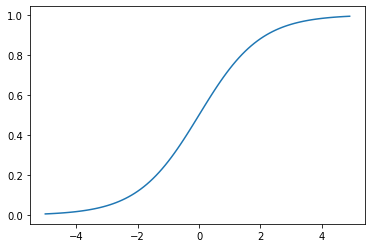

In [ ]:
x=np.arange(-5,5,0.1)
y=1/(1+np.e**(-x))
plt.plot(x,y)

## Regresión logística 

La regresión logística consiste en ajustar los valores de $\beta_i$ a partir de los datos dados.

$y=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_kx_k)}}$

## Lectura de datos para clasificar dígitos


In [ ]:
datos = np.genfromtxt('/content/sample_data/mnist_train_small.csv', delimiter=',')
datos

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_shape=datos.shape
train_shape

(20000, 785)

In [ ]:
datos.shape

(20000, 785)

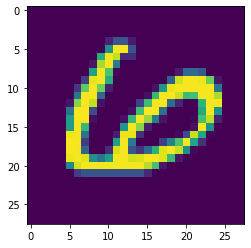

In [ ]:
plt.imshow(datos[0,1:].reshape((28,28)))


El conjunto de datos son leído en un arreglo de Numpy. Cada renglón corresponde a un dígito, la primera columna es el valor del dígito la cual corresponderá a la variable `y`. Las restantes 784 columna corresponde a los pixeles del digito, cada uno tiene una resolución de 28x28. En total hay 20000 dígitos.


In [ ]:
def describe_axis(arr,axis=0):
  print("Array =", arr[:5])
  return dict(
  shape = arr.shape,
  mean = np.mean(arr,axis=axis),
  median = np.median(arr,axis=axis),
  amin = np.amin(arr,axis=axis),
  amax = np.amax(arr,axis=axis),
  ptp = np.ptp(arr,axis=axis),
  var = np.var(arr,axis=axis),
  std = np.std(arr,axis=axis),
  )
  # print("Shape =", arr.shape)
  # print("Mean =", mean)
  # print("Median =", median) 
  # print("Measures of Dispersion")
  # print("Minimum =", min)
  # print("Maximum =", max)
  # print("Range =", range)
  # print("Variance =", variance)
  # print("Standard Deviation =", sd)



In [ ]:
describe_axis(y)

Array = [0.00669285 0.00739154 0.00816257 0.0090133  0.0099518 ]


{'shape': (100,),
 'mean': 0.4950669285092411,
 'median': 0.4875104062605256,
 'amin': 0.006692850924284857,
 'amax': 0.9926084586557179,
 'ptp': 0.985915607731433,
 'var': 0.15131532800085024,
 'std': 0.38899270944434194}

## Clasificación de dos dígitos con dos características.
En este primer ejemplo no usaremos los 784 pixeles, sino solo dos características. Una tendrá la suma de los pixeles de la mitad izquierda y la otra tendrá la suma de los pixeles de la mitad derecha.

In [ ]:
X_orig=[]
y=[]
clases=(6,9)
tot_num_obj_cla=1800
num_obj_class=[0,0]
for i in range(train_shape[0]):
  if datos[i,0] in clases:
    clase=clases.index(datos[i,0])
    if num_obj_class[clase] >= tot_num_obj_cla:
      continue
    num_obj_class[clase] += 1
    y.append(clase)
    X_orig.append((datos[i,1:28*14+1].sum(),datos[i,28*14+1:].sum()))

X_orig=np.array(X_orig)
X=(X_orig//5000)
y=np.array(y)
len(X),len(y),num_obj_class



(3600, 3600, [1800, 1800])

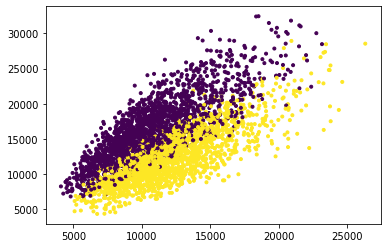

In [ ]:
ax = plt.axes()#projection='3d')
ax.scatter(X_orig[:,0], X_orig[:,1], c=y,marker='.')

### Regresión lineal vs regresión logística

Para separar las dos regiones con una línea recta no es posible usar la regresión lineal, ya que la regresión lineal usa un sólo conjuntos de puntos y pasa lo más cercano a los puntos. Por ejemplo, con la regresión lineal se podría hacer una recta que pasa por medio de los puntos amarillos y otra recta que pasa por medio de los puntos morados. Sin embargo, eso no sería de manera inmediata una forma para clasificar los puntos.


Por otro lado, la regresión logística 
$y=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_kx_k)}}$ 
 sí permite encontrar, de manera inmediata,  una recta que separa las dos regiones. Ya que podemos suponer que en la frontera $y=\frac{1}{2}$. Además, como sólo hay dos atributos, $k=2$.


$\frac{1}{2}=\frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2)}}$

$2=1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2)}$

$1=e^{-(\beta_0+\beta_1x_1+\beta_2x_2)}$

$0=\beta_0+\beta_1x_1+\beta_2x_2$

$x_2=-(\beta_0+\beta_1x_1)/\beta_2$

La cual corresponde a la ecuación de la recta que separa las dos regiones.





### División de datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                       X_orig,
                                       y,
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2700, 2), (900, 2), (2700,), (900,))

### Entrenamiento del modelo

In [ ]:
modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)

LogisticRegression()

In [ ]:
A,B=modelo.coef_.tolist()[0]
C=modelo.intercept_[0]
A,B,C

(0.0012634245259851003, -0.0010209980814786833, 3.2213447748782785e-07)

$Ax+By=C$

$y=(C-Ax)/B$

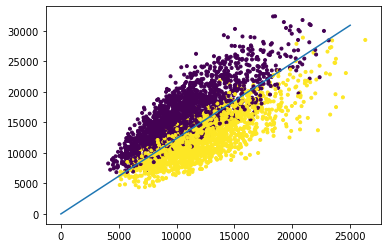

In [ ]:
def y_modelo(x,A,B,C):
  return (C-x*A)/B

ax = plt.axes()#projection='3d')
ax.scatter(X_orig[:,0], X_orig[:,1], c=y,marker='.')
ax.plot([0,25000],[y_modelo(0,A,B,C),y_modelo(25000,A,B,C)])

### Evaluación del modelo

In [ ]:
accuracy_score(y_train, modelo.predict(X_train))

0.8688888888888889

In [ ]:
accuracy_score(y_test, modelo.predict(X_test))

0.8955555555555555

In [ ]:
confusion_matrix(y_train, modelo.predict(X_train))

array([[1153,  183],
       [ 171, 1193]])

In [ ]:
confusion_matrix(y_test, modelo.predict(X_test))

array([[415,  49],
       [ 45, 391]])

El modelo funciona relativamente bien para separar estos dos dígitos. Sin embargo, vamos a ver que no funciona bien para los otros dígitos.

## Clasificación de diez dígitos con dos características.

In [ ]:
X_orig=[]
y=[]
clases=(0,1,2,3,4,5,6,7,8,9)
tot_num_obj_cla=1800
num_obj_class=[0]*len(clases)
for i in range(train_shape[0]):
  if datos[i,0] in clases:
    clase=clases.index(datos[i,0])
    if num_obj_class[clase] >= tot_num_obj_cla:
      continue
    num_obj_class[clase] += 1
    y.append(clase)
    X_orig.append((datos[i,1:28*14+1].sum(),datos[i,28*14+1:].sum()))

X_orig=np.array(X_orig)
X=(X_orig//5000)
y=np.array(y)
len(X),len(y),num_obj_class



(17961, 17961, [1800, 1800, 1800, 1800, 1800, 1761, 1800, 1800, 1800, 1800])

In [ ]:
describe_axis(X)

Array = [[2. 3.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]


{'shape': (17961, 2),
 'mean': array([1.97511274, 2.29018429]),
 'median': array([2., 2.]),
 'amin': array([0., 0.]),
 'amax': array([6., 7.]),
 'ptp': array([6., 7.]),
 'var': array([0.79850094, 1.05581869]),
 'std': array([0.8935888 , 1.02753038])}

In [ ]:
describe_axis(y)

Array = [6 5 7 9 5]


{'shape': (17961,),
 'mean': 4.498914314347753,
 'median': 4.0,
 'amin': 0,
 'amax': 9,
 'ptp': 9,
 'var': 8.267369791722608,
 'std': 2.8753034260270005}

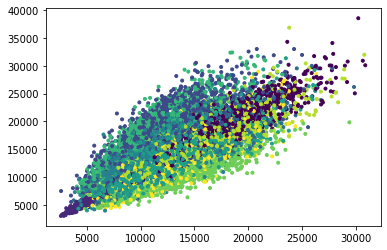

In [ ]:
ax = plt.axes()#projection='3d')
ax.scatter(X_orig[:,0], X_orig[:,1], c=y,marker='.')

 ### División de datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                       X_orig,
                                       y,
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13470, 2), (4491, 2), (13470,), (4491,))

### Entrenamiento del modelo

In [ ]:
modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)

LogisticRegression()

In [ ]:
modelo.coef_.tolist()[0]

[0.0001245073994794718, -5.479927661916416e-05]

In [ ]:
modelo.intercept_

array([-1.06129155e-06,  1.45106668e-06, -4.02634200e-07, -2.29885548e-07,
        2.66047130e-07,  1.21776666e-08, -7.65227366e-08,  3.52588181e-07,
       -5.03913144e-07,  1.92367520e-07])

In [ ]:
# A,B=modelo.coef_.tolist()[0]
# C=modelo.intercept_[0]
# A,B,C

$Ax+By=C$

$y=(C-Ax)/B$

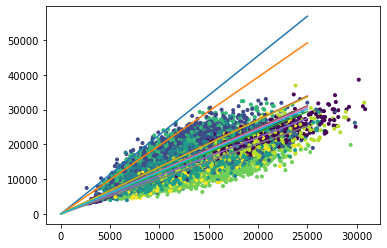

In [ ]:
def y_modelo(x,A,B,C):
  return (C-x*A)/B

ax = plt.axes()#projection='3d')
ax.scatter(X_orig[:,0], X_orig[:,1], c=y,marker='.')

for (A,B),C in zip(modelo.coef_,modelo.intercept_):
  ax.plot([0,25000],[y_modelo(0,A,B,C),y_modelo(25000,A,B,C)])

### Evaluación del Modelo

In [ ]:
accuracy_score(y_train, modelo.predict(X_train))

0.26458797327394207

In [ ]:
accuracy_score(y_test, modelo.predict(X_test))

0.27076374972166556

El modelo fracasa al tratar de clasificar todos los dígitos. Seguramente porque sólo tiene dos características. A continuación vamos a repetir el proceso pero cada pixel será una característica.

## Clasificación de 10 los dígitos con 784 características, sin penalidad

In [ ]:
def describe_axis(arr,axis=0):
  print("Array =", arr[:5])
  return dict(
  shape = arr.shape,
  mean = np.mean(arr,axis=axis),
  median = np.median(arr,axis=axis),
  amin = np.amin(arr,axis=axis),
  amax = np.amax(arr,axis=axis),
  ptp = np.ptp(arr,axis=axis),
  var = np.var(arr,axis=axis),
  std = np.std(arr,axis=axis),
  )
  # print("Shape =", arr.shape)
  # print("Mean =", mean)
  # print("Median =", median) 
  # print("Measures of Dispersion")
  # print("Minimum =", min)
  # print("Maximum =", max)
  # print("Range =", range)
  # print("Variance =", variance)
  # print("Standard Deviation =", sd)



In [ ]:
X=datos[:,1:]
X.shape

(20000, 784)

In [ ]:
y=datos[:,0]
y.shape

(20000,)

In [ ]:
describe_axis(y)

Array = [6. 5. 7. 9. 5.]


{'shape': (20000,),
 'mean': 4.4702,
 'median': 4.0,
 'amin': 0.0,
 'amax': 9.0,
 'ptp': 9.0,
 'var': 8.367611960000001,
 'std': 2.892682485168395}

### División de datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((15000, 784), (5000, 784), (15000,), (5000,))

### Evaluación del modelo

In [ ]:
modelo = LogisticRegression()
modelo.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
accuracy_score(y_train, modelo.predict(X_train))

0.9570666666666666

In [ ]:
accuracy_score(y_test, modelo.predict(X_test))

0.9004

El modelo tiene un desempeño mucho mejor

In [ ]:
confusion_matrix(y_train, modelo.predict(X_train))

array([[1451,    0,    0,    0,    2,    5,    2,    0,    5,    1],
       [   0, 1626,    4,    3,    2,    1,    2,    0,    8,    2],
       [   7,    8, 1424,   18,   11,    5,    3,    6,   21,    3],
       [   3,    4,   21, 1428,    3,   36,    4,    3,   20,    8],
       [   1,    5,    8,    0, 1376,    2,    5,    4,    5,   29],
       [   9,    1,    9,   29,    7, 1246,   11,    1,   28,    8],
       [   4,    0,    5,    0,    5,    4, 1524,    0,    6,    1],
       [   1,    1,   13,    4,    7,    2,    0, 1533,    2,   38],
       [   1,   14,   14,   21,    1,   23,    5,    1, 1327,   12],
       [   3,    3,    2,   11,   21,    0,    0,   28,    8, 1421]])

In [ ]:
confusion_matrix(y_test, modelo.predict(X_test))

array([[471,   0,   4,   0,   2,   8,   6,   0,   4,   1],
       [  0, 572,   6,   1,   1,   2,   1,   2,   9,   1],
       [  7,   6, 425,  10,   9,   7,   3,   2,  11,   3],
       [  4,   4,   8, 421,   1,  26,   2,   7,  12,   6],
       [  4,   2,   5,   0, 439,   0,   4,   2,   6,  27],
       [  5,   3,   1,  17,   4, 338,   9,   4,  26,   5],
       [  0,   4,   6,   1,   7,   6, 464,   0,   2,   0],
       [  5,   3,   4,   4,   4,   1,   1, 486,   3,  14],
       [  4,  17,   9,  16,   2,  13,   3,   2, 418,   9],
       [  5,   2,   1,   8,  15,   5,   0,  15,   7, 468]])



```
# Esto tiene formato de código
```

Una exactitud del 90% significa que, al leer una cifra de 10 dígitos, como el código de la universidad o un número telefónico con indicativo, lo más probable es que cometa un error en algunno de sus dígitos. Por lo tanto, es necesario aumentar la exactiud. Esto se logra con redes neuronales convolucionales las cuales tienen en cuenta las vecindades de un pixel. 


Ahora evaluaremos la cantidad de coeficientes que realmente requiere el modelo


In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
modelo.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
zeros = np.count_nonzero(modelo.coef_ == 0)
zeros

970

De los 7840 coeficientes que requiere el modelo 970 están en cero, es decir que se pueden ignorar.

## Clasificación de 10 los dígitos con 784 características con penalidad tipo _Ridge_

In [ ]:
from sklearn.linear_model import LogisticRegression
#from sklearn.datasets import load_iris
#X, y = load_iris(return_X_y=True)
modelo = LogisticRegression(penalty='l2', solver='liblinear')
#log.fit(X, y)
modelo.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(solver='liblinear')

In [ ]:
accuracy_score(y_train, modelo.predict(X_train))

0.967

In [ ]:
accuracy_score(y_test, modelo.predict(X_test))

0.8788

In [ ]:
confusion_matrix(y_train, modelo.predict(X_train))

array([[1466,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1648,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1441,   15,    5,    5,    3,    2,   29,    6],
       [   1,    0,   23, 1450,    0,   19,    2,    0,   21,   14],
       [   0,    0,    5,    2, 1389,    3,    0,    1,    5,   30],
       [   1,    0,    6,   24,   10, 1263,    5,    1,   28,   11],
       [   0,    0,    1,    0,    1,   10, 1528,    0,    8,    1],
       [   0,    0,    1,    1,    2,    0,    0, 1583,    0,   14],
       [   1,    0,    7,   30,    2,   26,    2,    0, 1334,   17],
       [   2,    0,    6,   20,   24,   11,    0,   15,   16, 1403]])

In [ ]:
confusion_matrix(y_test, modelo.predict(X_test))

array([[464,   0,   7,   2,   0,   2,   6,   2,  11,   2],
       [  0, 563,   6,   1,   2,   1,   0,   3,  19,   0],
       [ 11,   7, 396,  13,   5,   3,  18,  14,  15,   1],
       [  6,   3,  14, 419,   2,  20,   1,   7,  16,   3],
       [  4,   5,   6,   1, 434,   1,   7,   3,   6,  22],
       [ 18,   4,   4,  20,   9, 326,   8,   5,  11,   7],
       [  6,   4,  11,   2,   6,   7, 450,   0,   4,   0],
       [  2,   1,   6,   3,   7,   0,   1, 478,   2,  25],
       [  6,  19,  12,  13,   2,  11,   3,   4, 412,  11],
       [  4,   3,   1,   9,  25,   3,   0,  21,   8, 452]])

In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
modelo.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
zeros = np.count_nonzero(modelo.coef_ == 0)
zeros

970

La penalidad tipo _Ridge_ (L2) practicamente no altera las cantidad de características usadas.

## Clasificación de 10 los dígitos con 784 características con penalidad tipo 
LASSO

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(penalty='l1', solver='liblinear')
modelo.fit(X = X_train, y = y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
accuracy_score(y_train, modelo.predict(X_train))

0.9674666666666667

In [ ]:
accuracy_score(y_test, modelo.predict(X_test))

0.8852

In [ ]:
confusion_matrix(y_train, modelo.predict(X_train))

array([[1466,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1647,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0, 1445,   14,    6,    8,    1,    3,   22,    7],
       [   1,    0,   25, 1450,    0,   20,    3,    0,   17,   14],
       [   0,    0,    4,    1, 1391,    4,    0,    2,    5,   28],
       [   2,    0,    5,   24,   10, 1266,    4,    1,   26,   11],
       [   0,    0,    1,    0,    1,    5, 1539,    0,    3,    0],
       [   0,    0,    2,    1,    2,    0,    0, 1577,    0,   19],
       [   1,    1,    8,   32,    3,   26,    1,    0, 1328,   19],
       [   3,    1,    6,   21,   23,    9,    0,   18,   13, 1403]])

In [ ]:
confusion_matrix(y_test, modelo.predict(X_test))

array([[465,   0,   6,   2,   0,   4,   7,   2,   8,   2],
       [  0, 565,   5,   1,   2,   3,   0,   3,  15,   1],
       [ 10,   4, 401,  12,   7,   4,  18,  11,  15,   1],
       [  4,   3,  15, 423,   1,  22,   2,   7,  11,   3],
       [  4,   5,   4,   1, 426,   4,  15,   0,   5,  25],
       [ 12,   5,   3,  17,   7, 342,   6,   6,   7,   7],
       [  2,   3,  13,   3,   6,  12, 449,   0,   2,   0],
       [  3,   1,   4,   3,   8,   0,   1, 483,   3,  19],
       [  4,  18,  13,  14,   2,   9,   3,   4, 414,  12],
       [  3,   2,   1,   8,  23,   4,   1,  17,   9, 458]])

In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
modelo.coef_.shape

(10, 784)

In [ ]:
modelo.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
zeros = np.count_nonzero(modelo.coef_ == 0)
zeros

2497

 Vemos como la penalidad tipo LASSO (L1) aumenta en más del doble la cantidad de características que no se usan.

## Conclusión

Una vez mas enfatizo que la regresión logística es usada com un clasificador, además puede tener penalizaciones tipo _Ridge_ (L2) y tipo LASSO (L1).